### Задание 1. Для реализованной модели построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [0]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [0]:
from sklearn.datasets import load_diabetes

In [0]:
X, y = load_diabetes(return_X_y=True)

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [0]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [0]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [0]:
def bias(y, z):
    return (y - z)

In [0]:
def gb_fit(X_train, X_test, y_train, y_test, eta, n_trees, max_depth):
    
    # Деревья будем записывать в список
    trees = []

    # Будем высчитывать коэффициенты внутри функции
    coefs = [1] * n_trees
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [0]:
# Число деревьев в ансамбле
# n_trees = 10

# для простоты примем коэффициенты равными 1
# coefs = [1] * n_trees

# Максимальная глубина деревьев
# max_depth = 3

# Шаг
eta = 1

trees1, train_errors1, test_errors1 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=10, max_depth=1)
trees2, train_errors2, test_errors2 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=10, max_depth=3)
trees3, train_errors3, test_errors3 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=10, max_depth=5)
trees4, train_errors4, test_errors4 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=50, max_depth=1)
trees5, train_errors5, test_errors5 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=50, max_depth=3)
trees6, train_errors6, test_errors6 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=50, max_depth=5)
trees7, train_errors7, test_errors7 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=75, max_depth=1)
trees8, train_errors8, test_errors8 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=75, max_depth=3)
trees9, train_errors9, test_errors9 = gb_fit(X_train, X_test, y_train, y_test, eta, n_trees=75, max_depth=5)

In [0]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta, n_trees, max_depth):
    coefs = [1] * n_trees
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    print()

In [0]:
evaluate_alg(X_train, X_test, y_train, y_test, trees1, eta, n_trees=10, max_depth=1)
evaluate_alg(X_train, X_test, y_train, y_test, trees2, eta, n_trees=10, max_depth=3)
evaluate_alg(X_train, X_test, y_train, y_test, trees3, eta, n_trees=10, max_depth=5)
evaluate_alg(X_train, X_test, y_train, y_test, trees4, eta, n_trees=50, max_depth=1)
evaluate_alg(X_train, X_test, y_train, y_test, trees5, eta, n_trees=50, max_depth=3)
evaluate_alg(X_train, X_test, y_train, y_test, trees6, eta, n_trees=50, max_depth=5)
evaluate_alg(X_train, X_test, y_train, y_test, trees7, eta, n_trees=75, max_depth=1)
evaluate_alg(X_train, X_test, y_train, y_test, trees8, eta, n_trees=75, max_depth=3)
evaluate_alg(X_train, X_test, y_train, y_test, trees9, eta, n_trees=75, max_depth=5)

Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2728.426636967329
Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3597.430308120523

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1045.7798382681854
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5417.086859946442

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 79.49312029255299
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6054.844906036735

Ошибка алгоритма из 50 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 1890.1391017214423
Ошибка алгоритма из 50 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3539.736994035011

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 49.15017558561618
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6013.59276219476

Ошибка ал

Построим графики зависимости ошибки на обучающей и тестовой выборках от количества деревьев и максимальной глубины деревьев.

In [0]:
import matplotlib.pyplot as plt

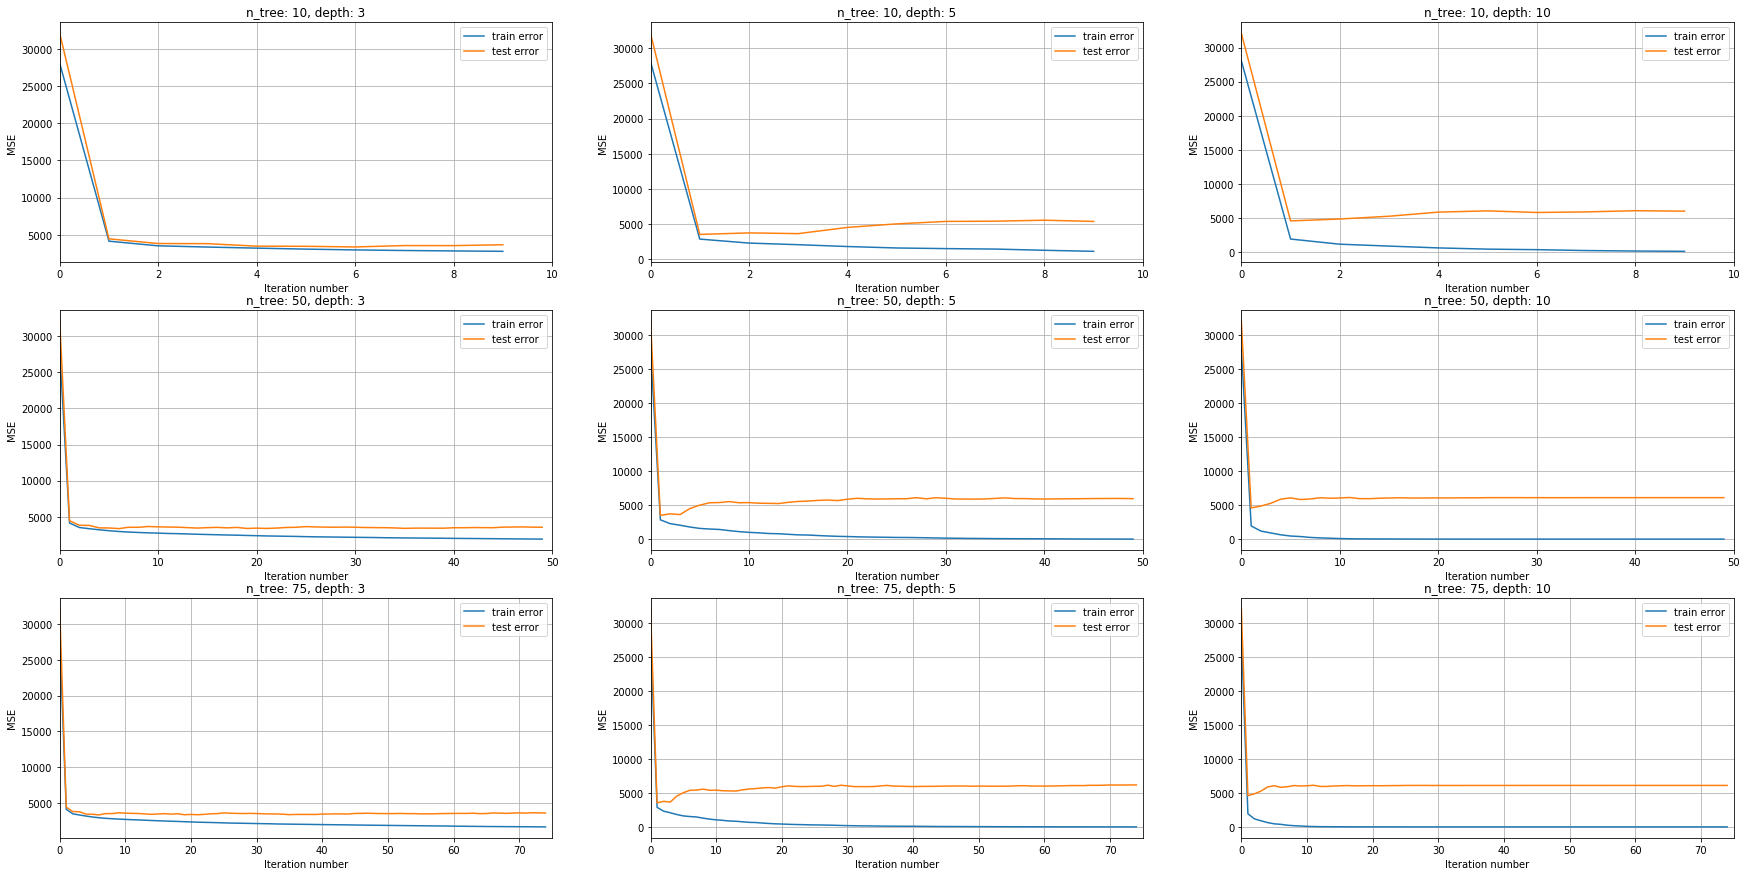

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()

ax1.set_title('n_tree: 10, depth: 1')
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('MSE')
ax1.set_xlim(0, 10)
ax1.plot(list(range(10)), train_errors1, label='train error')
ax1.plot(list(range(10)), test_errors1, label='test error')
ax1.legend(loc='upper right')
ax1.grid()

ax2.set_title('n_tree: 10, depth: 3')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('MSE')
ax2.set_xlim(0, 10)
ax2.plot(list(range(10)), train_errors2, label='train error')
ax2.plot(list(range(10)), test_errors2, label='test error')
ax2.legend(loc='upper right')
ax2.grid()

ax3.set_title('n_tree: 10, depth: 5')
ax3.set_xlabel('Iteration number')
ax3.set_ylabel('MSE')
ax3.set_xlim(0, 10)
ax3.plot(list(range(10)), train_errors3, label='train error')
ax3.plot(list(range(10)), test_errors3, label='test error')
ax3.legend(loc='upper right')
ax3.grid()

ax4.set_title('n_tree: 50, depth: 1')
ax4.set_xlabel('Iteration number')
ax4.set_ylabel('MSE')
ax4.set_xlim(0, 50)
ax4.plot(list(range(50)), train_errors4, label='train error')
ax4.plot(list(range(50)), test_errors4, label='test error')
ax4.legend(loc='upper right')
ax4.grid()

ax5.set_title('n_tree: 50, depth: 3')
ax5.set_xlabel('Iteration number')
ax5.set_ylabel('MSE')
ax5.set_xlim(0, 50)
ax5.plot(list(range(50)), train_errors5, label='train error')
ax5.plot(list(range(50)), test_errors5, label='test error')
ax5.legend(loc='upper right')
ax5.grid()

ax6.set_title('n_tree: 50, depth: 5')
ax6.set_xlabel('Iteration number')
ax6.set_ylabel('MSE')
ax6.set_xlim(0, 50)
ax6.plot(list(range(50)), train_errors6, label='train error')
ax6.plot(list(range(50)), test_errors6, label='test error')
ax6.legend(loc='upper right')
ax6.grid()

ax7.set_title('n_tree: 75, depth: 1')
ax7.set_xlabel('Iteration number')
ax7.set_ylabel('MSE')
ax7.set_xlim(0, 75)
ax7.plot(list(range(75)), train_errors7, label='train error')
ax7.plot(list(range(75)), test_errors7, label='test error')
ax7.legend(loc='upper right')
ax7.grid()

ax8.set_title('n_tree: 75, depth: 3')
ax8.set_xlabel('Iteration number')
ax8.set_ylabel('MSE')
ax8.set_xlim(0, 75)
ax8.plot(list(range(75)), train_errors8, label='train error')
ax8.plot(list(range(75)), test_errors8, label='test error')
ax8.legend(loc='upper right')
ax8.grid()

ax9.set_title('n_tree: 75, depth: 5')
ax9.set_xlabel('Iteration number')
ax9.set_ylabel('MSE')
ax9.set_xlim(0, 75)
ax9.plot(list(range(75)), train_errors9, label='train error')
ax9.plot(list(range(75)), test_errors9, label='test error')
ax9.legend(loc='upper right')
ax9.grid()

plt.show()

Из полученных значений и графиков мы можем сделать вывод, что ошибка на тестовой выборке растет при увеличении глубины деревьев. При опредленном количестве итераций (в нашем случае 6) начинает расти переобучение и вместе с ним и ошибка.